In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.inspection import permutation_importance
import clean as c
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = c.df_b
df1 = c.df1
df2 = c.df2
feats = c.feats

In [3]:
pd.get_dummies(c.df.Outcome, drop_first=False)

,Deteriorated,Improved,No Change
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
495,False,True,False
496,True,False,False
497,True,False,False
498,False,True,False


# Feature Selection

In [4]:
X = df1[feats]
y = df1['Out_b']
selector = SelectKBest(score_func=f_regression, k=3)
print(df.head(n=3)) # to see which features were best

   Patient ID  Age  Gender                  Diagnosis  \
0           1   43       1  Major Depressive Disorder   
1           2   40       1  Major Depressive Disorder   
2           3   55       1  Major Depressive Disorder   

   Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
0                        1                  0                     1   
1                        1                  0                     0   
2                        1                  0                     0   

   Physical Activity (hrs/week)        Medication               Therapy Type  \
0                             5  Mood Stabilizers      Interpersonal Therapy   
1                             7    Antipsychotics      Interpersonal Therapy   
2                             3             SSRIs  Mindfulness-Based Therapy   

   Treatment Duration (weeks)  Stress Level (1-10)       Outcome  \
0                          11                    1  Deteriorated   
1                          11

pi.importances_mean=[ 4.87729381e-04  1.02630442e-02  1.75741601e-03  5.45820370e-03
  1.37585668e-03 -3.02450944e-05  2.00688260e-03  1.31337519e-03
  1.95125288e-03]
pi.importances_std=[0.00511534 0.00469862 0.00315559 0.00510731 0.00616144 0.00146458
 0.00142822 0.00644565 0.00406144]
pi.importances=[[-0.0012144  -0.00881066  0.00396799  0.00498507  0.00351065]
 [ 0.00658472  0.00333194  0.01536809  0.01496514  0.01106533]
 [-0.00301005  0.00112735  0.00146389  0.00232448  0.00688141]
 [ 0.00344096  0.00539252 -0.00141861  0.00552671  0.01434945]
 [ 0.00128856 -0.00886408  0.00814712  0.0072023  -0.00089461]
 [ 0.00111873  0.00070105 -0.00213287  0.00156827 -0.00140641]
 [ 0.00264048  0.00433376  0.00012297  0.0018254   0.0011118 ]
 [-0.00227688  0.00258562  0.0133819  -0.00369983 -0.00342393]
 [-0.00419887  0.00664207  0.00353758 -0.00128434  0.00505983]]


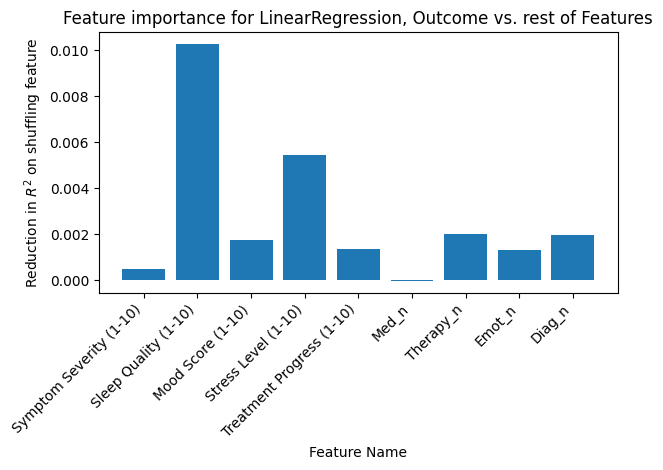

In [5]:
model = linear_model.LinearRegression()
model.fit(X, y)
pi = permutation_importance(estimator=model, X=X, y=y, random_state=0)

print(f'pi.importances_mean={pi.importances_mean}')
print(f'pi.importances_std={pi.importances_std}')
print(f'pi.importances={pi.importances}')

# Create the bar plot
plt.bar(x=range(X.shape[1]), height=pi.importances_mean, tick_label=X.columns)
plt.title('Feature importance for LinearRegression, Outcome vs. rest of Features')
plt.xlabel('Feature Name')
plt.ylabel(r'Reduction in $R^2$ on shuffling feature')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align right
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Symptom Severity (1-10)'),
  Text(1, 0, 'Sleep Quality (1-10)'),
  Text(2, 0, 'Mood Score (1-10)'),
  Text(3, 0, 'Stress Level (1-10)'),
  Text(4, 0, 'Treatment Progress (1-10)'),
  Text(5, 0, 'Med_n'),
  Text(6, 0, 'Therapy_n'),
  Text(7, 0, 'Emot_n'),
  Text(8, 0, 'Diag_n')])

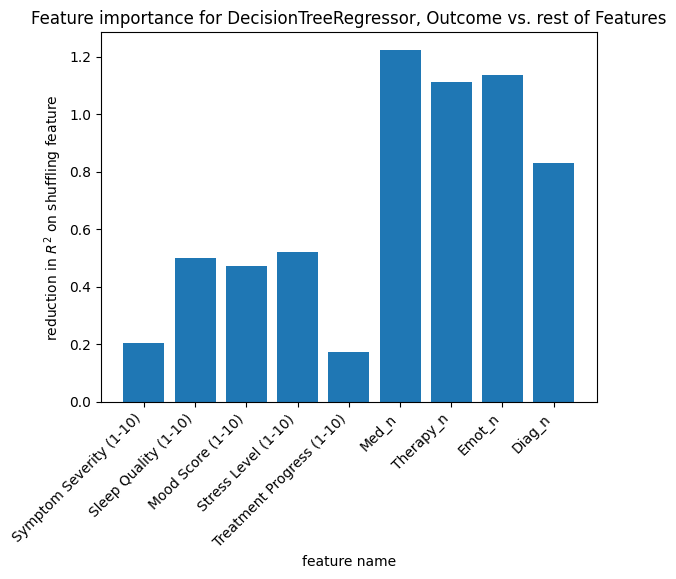

In [6]:
model = DecisionTreeRegressor()
model.fit(X, y)
pi = permutation_importance(estimator=model, X=X, y=y, random_state=0)
plt.bar(x=range(X.columns.size), height=pi.importances_mean, tick_label=X.columns)
plt.title('Feature importance for DecisionTreeRegressor, Outcome vs. rest of Features')
plt.xlabel('feature name')
_ = plt.ylabel(r'reduction in $R^2$ on shuffling feature')
plt.xticks(rotation=45, ha='right')

pi.importances_mean=[-0.00668693  0.01884498  0.0006079   0.00303951 -0.00851064  0.02006079
 -0.00486322  0.02613982  0.00425532]
pi.importances_std=[0.01797173 0.01175628 0.01042336 0.00901665 0.01059915 0.01028057
 0.0187959  0.01162986 0.00933878]
pi.importances=[[-0.03039514 -0.02431611  0.00911854  0.01519757 -0.00303951]
 [ 0.0212766  -0.00303951  0.02735562  0.03039514  0.01823708]
 [ 0.00911854 -0.00911854  0.01519757  0.         -0.01215805]
 [ 0.          0.01215805 -0.01215805  0.00303951  0.01215805]
 [-0.00911854 -0.02735562  0.          0.00303951 -0.00911854]
 [ 0.03039514  0.02735562  0.00607903  0.02735562  0.00911854]
 [ 0.00303951  0.00911854 -0.00911854  0.01215805 -0.03951368]
 [ 0.01823708  0.02735562  0.04255319  0.00911854  0.03343465]
 [-0.00607903  0.          0.01823708  0.01215805 -0.00303951]]


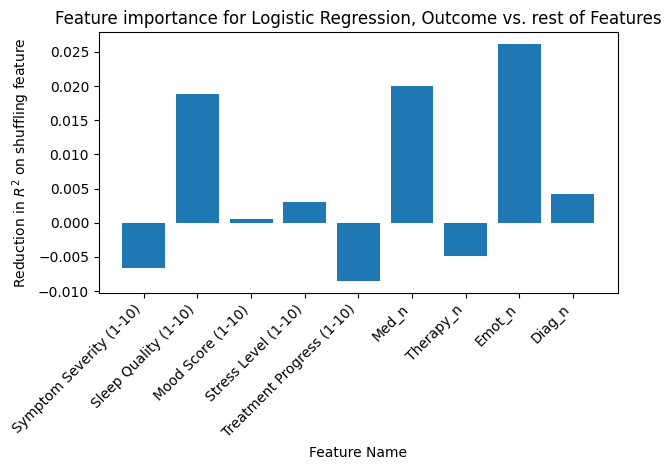

In [7]:
model = linear_model.LogisticRegression()
model.fit(X, y)
pi = permutation_importance(estimator=model, X=X, y=y, random_state=0)

print(f'pi.importances_mean={pi.importances_mean}')
print(f'pi.importances_std={pi.importances_std}')
print(f'pi.importances={pi.importances}')

# Create the bar plot
plt.bar(x=range(X.shape[1]), height=pi.importances_mean, tick_label=X.columns)
plt.title('Feature importance for Logistic Regression, Outcome vs. rest of Features')
plt.xlabel('Feature Name')
plt.ylabel(r'Reduction in $R^2$ on shuffling feature')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align right
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

pi.importances_mean=[-0.00364742  0.00121581 -0.00547112  0.01458967  0.01215805  0.1343465
  0.09300912  0.13495441  0.07659574]
pi.importances_std=[0.00824599 0.00953458 0.01159805 0.00909826 0.00998886 0.02631594
 0.01819651 0.01947188 0.01916581]
pi.importances=[[-0.01215805 -0.00911854 -0.00911854  0.00303951  0.00911854]
 [ 0.          0.00303951  0.01823708 -0.00911854 -0.00607903]
 [ 0.          0.01215805 -0.01823708 -0.00303951 -0.01823708]
 [ 0.01215805  0.          0.01215805  0.02431611  0.02431611]
 [ 0.03039514  0.00911854  0.01215805  0.00911854  0.        ]
 [ 0.16413374  0.14589666  0.14893617  0.0881459   0.12462006]
 [ 0.12158055  0.07294833  0.08510638  0.10638298  0.07902736]
 [ 0.1550152   0.11550152  0.16109422  0.12765957  0.11550152]
 [ 0.07294833  0.08206687  0.10030395  0.08510638  0.04255319]]


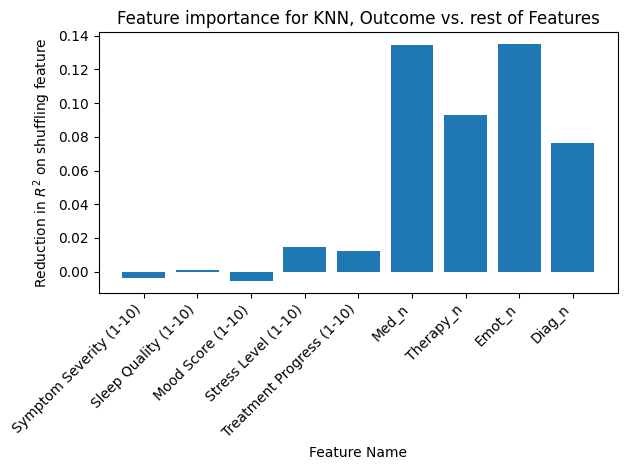

In [8]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
pi = permutation_importance(estimator=model, X=X, y=y, random_state=0)

print(f'pi.importances_mean={pi.importances_mean}')
print(f'pi.importances_std={pi.importances_std}')
print(f'pi.importances={pi.importances}')

# Create the bar plot
plt.bar(x=range(X.shape[1]), height=pi.importances_mean, tick_label=X.columns)
plt.title('Feature importance for KNN, Outcome vs. rest of Features')
plt.xlabel('Feature Name')
plt.ylabel(r'Reduction in $R^2$ on shuffling feature')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align right
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# For the Second Binary Outcome

Evaluating KNN...
pi.importances_mean=[-0.00606061 -0.01272727 -0.01333333 -0.01090909 -0.0030303   0.10363636
  0.08242424  0.08969697  0.0569697 ]
pi.importances_std=[0.00663906 0.01124075 0.00593816 0.00988455 0.00663906 0.0369846
 0.01842265 0.00309031 0.02864558]
pi.importances=[[-0.00909091  0.         -0.00909091 -0.01515152  0.0030303 ]
 [ 0.00606061 -0.00606061 -0.01818182 -0.02424242 -0.02121212]
 [-0.00909091 -0.00909091 -0.00909091 -0.02424242 -0.01515152]
 [-0.02727273 -0.01212121  0.0030303  -0.01212121 -0.00606061]
 [-0.01515152  0.0030303   0.0030303  -0.0030303  -0.0030303 ]
 [ 0.15454545  0.10909091  0.12121212  0.09090909  0.04242424]
 [ 0.05151515  0.08181818  0.08181818  0.10909091  0.08787879]
 [ 0.08787879  0.09393939  0.08484848  0.09090909  0.09090909]
 [ 0.08181818  0.08484848  0.06363636  0.00606061  0.04848485]]


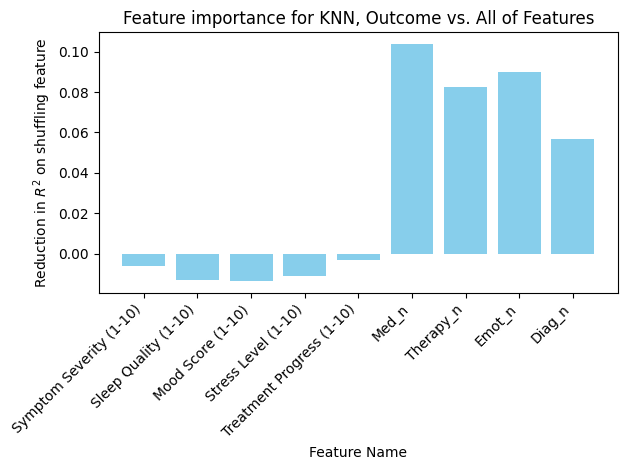

Evaluating Decision Tree...
pi.importances_mean=[0.04727273 0.15090909 0.13212121 0.04242424 0.12545455 0.3030303
 0.35212121 0.29333333 0.20909091]
pi.importances_std=[0.00242424 0.02111667 0.01024941 0.00271039 0.01279922 0.01787622
 0.02111667 0.02254676 0.0057496 ]
pi.importances=[[0.04848485 0.04545455 0.04545455 0.05151515 0.04545455]
 [0.14545455 0.16060606 0.12121212 0.14242424 0.18484848]
 [0.14242424 0.11818182 0.12121212 0.13939394 0.13939394]
 [0.03939394 0.04545455 0.03939394 0.04242424 0.04545455]
 [0.11818182 0.14848485 0.11515152 0.11515152 0.13030303]
 [0.3        0.3030303  0.33636364 0.29090909 0.28484848]
 [0.34242424 0.36363636 0.33030303 0.33636364 0.38787879]
 [0.27878788 0.32121212 0.29090909 0.26060606 0.31515152]
 [0.21515152 0.20606061 0.21515152 0.20909091 0.2       ]]


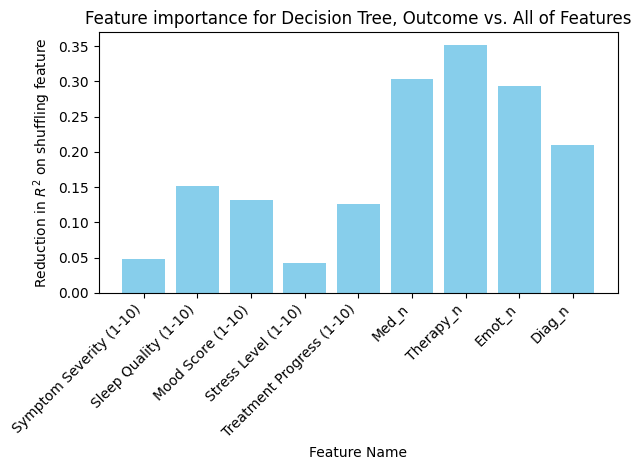

Evaluating SVM...
pi.importances_mean=[-0.00242424  0.0369697   0.00787879  0.01212121  0.03393939  0.03030303
 -0.01030303  0.00242424 -0.00606061]
pi.importances_std=[0.00946697 0.00965902 0.01159462 0.01313908 0.01277049 0.0144695
 0.01127338 0.00484848 0.0168175 ]
pi.importances=[[ 0.0030303   0.         -0.02121212  0.0030303   0.0030303 ]
 [ 0.03333333  0.04848485  0.02121212  0.03636364  0.04545455]
 [-0.0030303   0.0030303   0.0030303   0.03030303  0.00606061]
 [-0.0030303   0.01212121  0.00606061  0.00909091  0.03636364]
 [ 0.03939394  0.03939394  0.00909091  0.04545455  0.03636364]
 [ 0.03030303  0.03333333  0.05151515  0.00606061  0.03030303]
 [-0.00606061 -0.02121212  0.00909091 -0.02121212 -0.01212121]
 [ 0.00909091 -0.0030303   0.00606061 -0.0030303   0.0030303 ]
 [ 0.         -0.03939394  0.00606061  0.          0.0030303 ]]


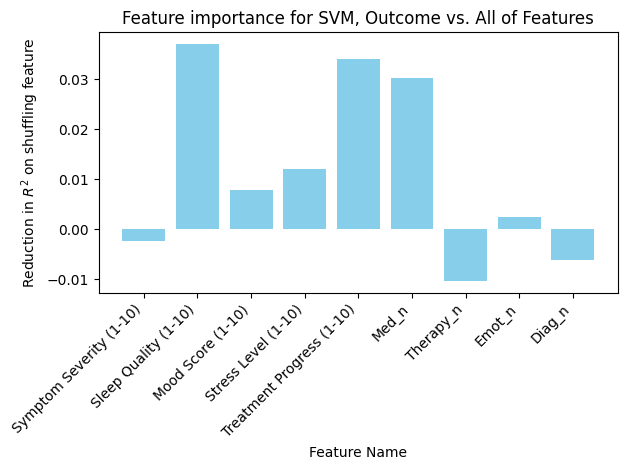

Evaluating Logistic Regression...
pi.importances_mean=[-6.06060606e-04  3.39393939e-02  1.87878788e-02  1.75757576e-02
  3.15151515e-02  4.24242424e-02 -2.42424242e-03 -7.27272727e-03
  2.22044605e-17]
pi.importances_std=[0.00353391 0.01107616 0.01513939 0.01360603 0.00890724 0.01591991
 0.01630742 0.00732306 0.00766613]
pi.importances=[[-0.00606061 -0.0030303   0.          0.0030303   0.0030303 ]
 [ 0.02121212  0.04848485  0.02424242  0.03030303  0.04545455]
 [ 0.01212121  0.01212121  0.01515152  0.04848485  0.00606061]
 [ 0.0030303   0.00909091  0.00909091  0.02727273  0.03939394]
 [ 0.03333333  0.03333333  0.01818182  0.02727273  0.04545455]
 [ 0.04242424  0.05757576  0.04848485  0.01212121  0.05151515]
 [ 0.0030303  -0.03333333  0.01515152  0.0030303   0.        ]
 [ 0.00606061 -0.00606061 -0.01212121 -0.01515152 -0.00909091]
 [ 0.0030303  -0.01515152  0.00606061  0.0030303   0.0030303 ]]


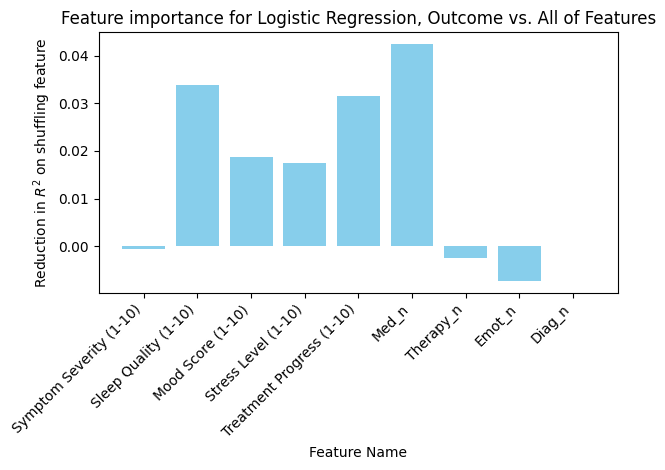

In [9]:
X = df2[feats]
y = df2['Out_b']

def plot_feature_importance(model, X, y, model_name="Model"):
    """
    Plots the feature importance for a given model using permutation importance.

    Parameters:
    - model: The machine learning model to analyze (must implement `fit` and support permutation importance).
    - X: DataFrame or ndarray of features.
    - y: Series or ndarray of the target variable.
    - model_name: String representing the name of the model (for labeling purposes).
    """
    # Fit the model
    model.fit(X, y)
    
    # Compute permutation importance
    pi = permutation_importance(estimator=model, X=X, y=y, random_state=0)
    
    # Print feature importance metrics
    print(f'pi.importances_mean={pi.importances_mean}')
    print(f'pi.importances_std={pi.importances_std}')
    print(f'pi.importances={pi.importances}')
    
    # Create the bar plot
    plt.bar(x=range(X.shape[1]), height=pi.importances_mean, tick_label=X.columns, color="skyblue")
    plt.title(f'Feature importance for {model_name}, Outcome vs. All of Features')
    plt.xlabel('Feature Name')
    plt.ylabel(r'Reduction in $R^2$ on shuffling feature')
    
    # Rotate the x-axis labels
    plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align right
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()
    
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=None, random_state=42)),
    ("SVM", SVC(kernel='linear', random_state=42, probability=True)),  # Use linear kernel
    ("Logistic Regression", linear_model.LogisticRegression(random_state=42))
]

# Loop through the models and call the function
for model_name, model in models:
    print(f"Evaluating {model_name}...")
    plot_feature_importance(model, X, y, model_name=model_name)

pi.importances_mean=[0.06121212 0.0830303  0.11636364 0.05151515 0.09393939 0.19515152
 0.21939394 0.15515152 0.20606061]
pi.importances_std=[0.00674881 0.00988455 0.00732306 0.00331953 0.00331953 0.02122078
 0.02351952 0.01073942 0.00977243]
pi.importances=[[0.05454545 0.07272727 0.05454545 0.06363636 0.06060606]
 [0.09090909 0.08787879 0.06363636 0.08484848 0.08787879]
 [0.13030303 0.11212121 0.11515152 0.10909091 0.11515152]
 [0.05151515 0.05151515 0.05757576 0.04848485 0.04848485]
 [0.09393939 0.1        0.09090909 0.09090909 0.09393939]
 [0.2        0.20909091 0.22424242 0.17575758 0.16666667]
 [0.17878788 0.21212121 0.22121212 0.24242424 0.24242424]
 [0.13636364 0.16363636 0.15151515 0.15757576 0.16666667]
 [0.20909091 0.1969697  0.19393939 0.22121212 0.20909091]]


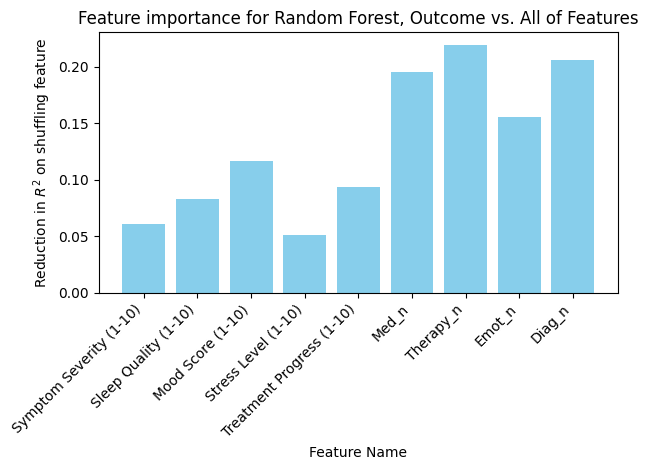

In [10]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
    
plot_feature_importance(rf_clf, X, y, "Random Forest")

# Redoing first binary measure

Evaluating KNN...
pi.importances_mean=[-0.00364742  0.00121581 -0.00547112  0.01458967  0.01215805  0.1343465
  0.09300912  0.13495441  0.07659574]
pi.importances_std=[0.00824599 0.00953458 0.01159805 0.00909826 0.00998886 0.02631594
 0.01819651 0.01947188 0.01916581]
pi.importances=[[-0.01215805 -0.00911854 -0.00911854  0.00303951  0.00911854]
 [ 0.          0.00303951  0.01823708 -0.00911854 -0.00607903]
 [ 0.          0.01215805 -0.01823708 -0.00303951 -0.01823708]
 [ 0.01215805  0.          0.01215805  0.02431611  0.02431611]
 [ 0.03039514  0.00911854  0.01215805  0.00911854  0.        ]
 [ 0.16413374  0.14589666  0.14893617  0.0881459   0.12462006]
 [ 0.12158055  0.07294833  0.08510638  0.10638298  0.07902736]
 [ 0.1550152   0.11550152  0.16109422  0.12765957  0.11550152]
 [ 0.07294833  0.08206687  0.10030395  0.08510638  0.04255319]]


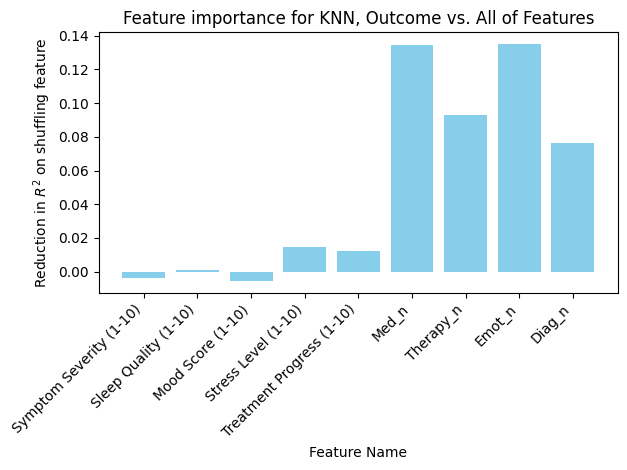

Evaluating Decision Tree...
pi.importances_mean=[0.04620061 0.12158055 0.08389058 0.13799392 0.02796353 0.29422492
 0.29118541 0.28571429 0.21762918]
pi.importances_std=[0.01159805 0.00384471 0.00529957 0.01178767 0.0029781  0.01295275
 0.01578207 0.01941486 0.01130764]
pi.importances=[[0.02431611 0.05775076 0.05167173 0.04559271 0.05167173]
 [0.12462006 0.12765957 0.11854103 0.11854103 0.11854103]
 [0.09118541 0.08206687 0.08206687 0.0881459  0.07598784]
 [0.12462006 0.14893617 0.13069909 0.13069909 0.1550152 ]
 [0.02735562 0.02735562 0.02735562 0.02431611 0.03343465]
 [0.28571429 0.27963526 0.31610942 0.30091185 0.2887538 ]
 [0.31306991 0.28267477 0.30699088 0.27963526 0.27355623]
 [0.27659574 0.26443769 0.28267477 0.28267477 0.32218845]
 [0.20364742 0.22492401 0.21884498 0.23404255 0.20668693]]


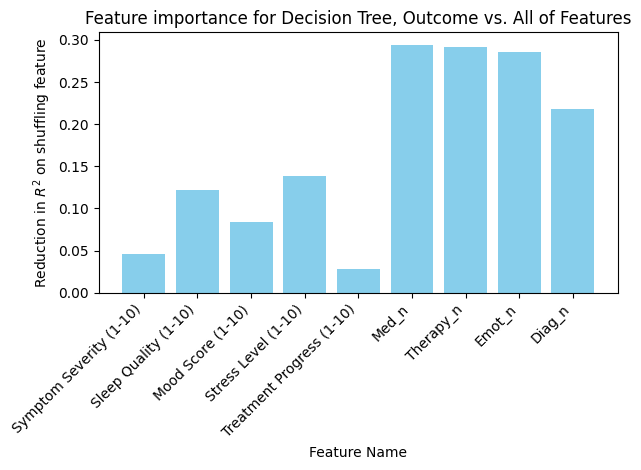

Evaluating SVM...
pi.importances_mean=[0.         0.02917933 0.         0.         0.         0.
 0.         0.         0.        ]
pi.importances_std=[0.         0.01353864 0.         0.         0.         0.
 0.         0.         0.        ]
pi.importances=[[0.         0.         0.         0.         0.        ]
 [0.02431611 0.00607903 0.04255319 0.04255319 0.03039514]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


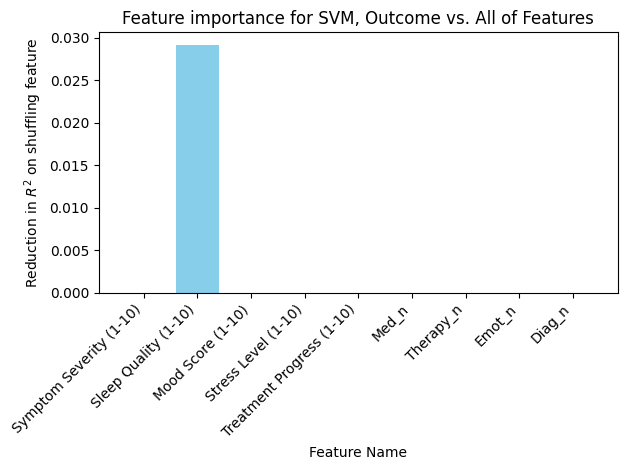

Evaluating Logistic Regression...
pi.importances_mean=[-0.00668693  0.01884498  0.0006079   0.00303951 -0.00851064  0.02006079
 -0.00486322  0.02613982  0.00425532]
pi.importances_std=[0.01797173 0.01175628 0.01042336 0.00901665 0.01059915 0.01028057
 0.0187959  0.01162986 0.00933878]
pi.importances=[[-0.03039514 -0.02431611  0.00911854  0.01519757 -0.00303951]
 [ 0.0212766  -0.00303951  0.02735562  0.03039514  0.01823708]
 [ 0.00911854 -0.00911854  0.01519757  0.         -0.01215805]
 [ 0.          0.01215805 -0.01215805  0.00303951  0.01215805]
 [-0.00911854 -0.02735562  0.          0.00303951 -0.00911854]
 [ 0.03039514  0.02735562  0.00607903  0.02735562  0.00911854]
 [ 0.00303951  0.00911854 -0.00911854  0.01215805 -0.03951368]
 [ 0.01823708  0.02735562  0.04255319  0.00911854  0.03343465]
 [-0.00607903  0.          0.01823708  0.01215805 -0.00303951]]


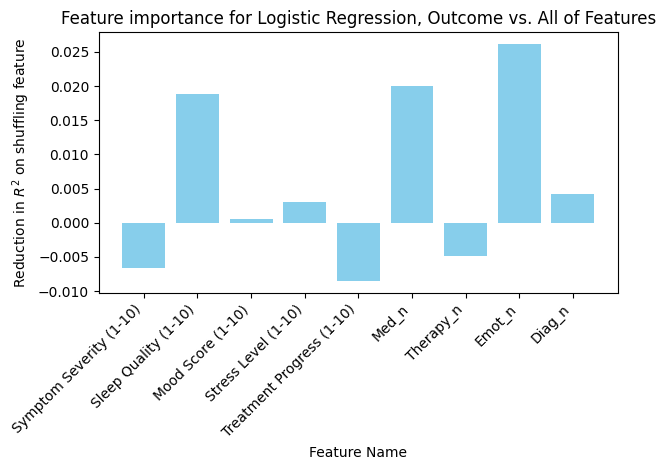

In [11]:
X = df1[feats]
y = df1['Out_b']

# Loop through the models and call the function
for model_name, model in models:
    print(f"Evaluating {model_name}...")
    plot_feature_importance(model, X, y, model_name=model_name)

pi.importances_mean=[0.0449848  0.10759878 0.08267477 0.04924012 0.02735562 0.19148936
 0.18844985 0.18237082 0.18419453]
pi.importances_std=[0.00846711 0.00933878 0.00929912 0.00824599 0.00192236 0.0143856
 0.01997772 0.02149261 0.01367443]
pi.importances=[[0.03039514 0.04255319 0.05471125 0.05167173 0.04559271]
 [0.10334347 0.12462006 0.09726444 0.10334347 0.10942249]
 [0.10030395 0.07902736 0.07902736 0.07294833 0.08206687]
 [0.04559271 0.04559271 0.03951368 0.05167173 0.06382979]
 [0.02735562 0.03039514 0.02735562 0.02431611 0.02735562]
 [0.2006079  0.18844985 0.21276596 0.17021277 0.18541033]
 [0.20972644 0.17933131 0.20668693 0.19148936 0.1550152 ]
 [0.19452888 0.15805471 0.1550152  0.19756839 0.20668693]
 [0.16717325 0.20668693 0.18541033 0.18844985 0.17325228]]


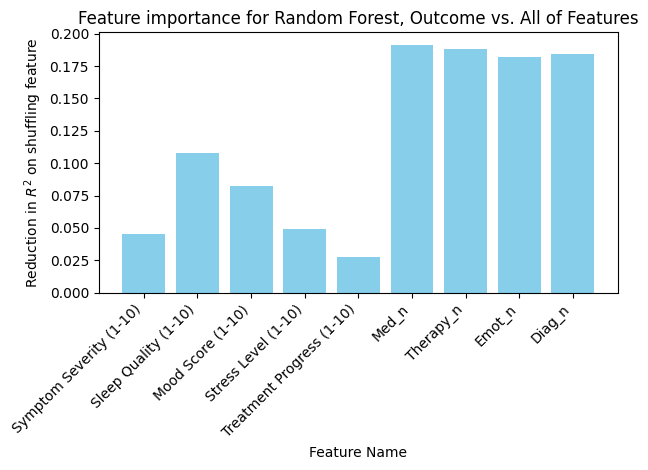

In [12]:

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
    
plot_feature_importance(rf_clf, X, y, "Random Forest")

In [13]:
c.encode_n

['Med_n', 'Therapy_n', 'Emot_n', 'Diag_n']

In [14]:
c.features

['Symptom Severity (1-10)',
 'Sleep Quality (1-10)',
 'Mood Score (1-10)',
 'Stress Level (1-10)',
 'Treatment Progress (1-10)']